Лабораторная работа номер 8

In [85]:
import sys as sus
import matplotlib.pyplot as plt
import numpy
from sklearn import cluster
import scipy.cluster.hierarchy as sch

Считывание данных

In [86]:
# Считываем данные
file = open('s1.txt', 'r')
points = []
if file != None:

    points = numpy.array([[int(x) for x in line.split()] for line in file])

    #for line in file:
    #    point = line.strip().split(' ')
    #    points.append([int(point[0]), int(point[1])])
    file.close()

X = [p[0] for p in points]
Y = [p[1] for p in points]

# print(points)
# print(X)


Настройка констант

In [87]:
def_clusters = 15
colors = ['#DC143C', '#FF00FF', '#A52A2A', '#61430C', '#FF4500', '#32CD32','#000080', '#FF1493', '#000000', '#808080',
                 '#800080', '#00FFFF', '#00FF00', '#008080', '#808000', '#d8deba','#007ba7', '#177245','#8FBC8F', '#556832', '#308446', '#B00000']

Сырые данные

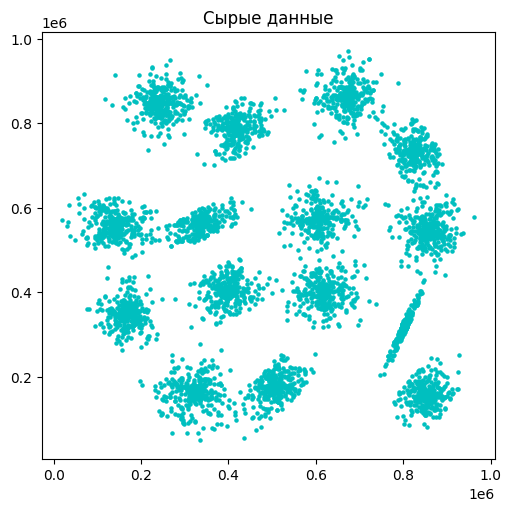

In [101]:
# Просто вывожу все данные
fig, ax = plt.subplots(figsize = (5, 5), layout='constrained')  
ax.scatter(X, Y, s=5, facecolor='c');
ax.set_title("Сырые данные");


K-Means

In [89]:
# K-Means cluster

kmeans = cluster.KMeans(n_clusters=def_clusters, max_iter=300, algorithm='lloyd')
kmeans_centroids = kmeans.fit_predict(points)

c:\Users\solom\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


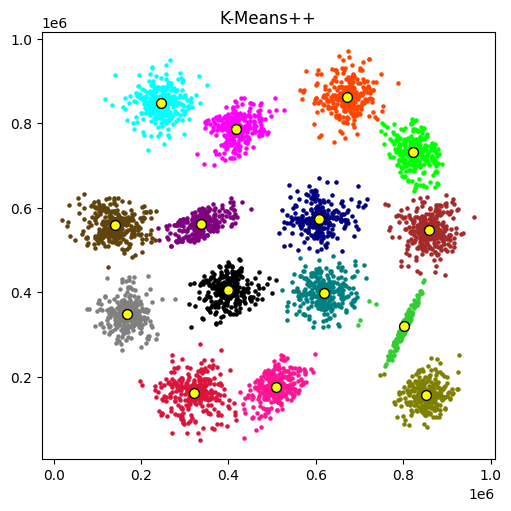

In [90]:
# K-Means visual

#Задал полотно
fig, ax = plt.subplots(figsize = (5, 5), layout='constrained')  
ax.set_title("K-Means++")

#Вывел цветом точки одного кластера для каждого кластера
for i in range (def_clusters):
    ax.scatter(points[kmeans_centroids == i, 0], points[kmeans_centroids == i, 1], s = 5, c = colors[i])

#Выставил центроиды
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, edgecolors='k', c = 'yellow', label = 'Centroids')


AffinityPropagation

In [91]:
# AffinityPropagation cluster
# Кластеризация суровой реальности
# Точку могут принять в кластер если она сама хочет и если точки захотят

affinity_propagation = cluster.AffinityPropagation(damping=0.975, verbose=True)
affinity_propagation_centroids = affinity_propagation.fit_predict(points)

Converged after 175 iterations.


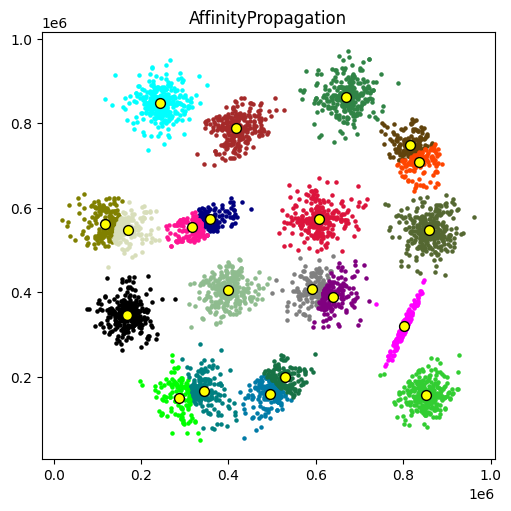

In [92]:
# AffinityPropagation visual

#Задал полотно
fig, ax = plt.subplots(figsize = (5, 5), layout='constrained')  
ax.set_title("AffinityPropagation")

#Вывел цветом точки одного кластера для каждого кластера
for i in range (min(affinity_propagation.labels_), max(affinity_propagation.labels_)+1):
    ax.scatter(points[affinity_propagation_centroids == i, 0], points[affinity_propagation_centroids == i, 1], s = 5, c = colors[i])

#Выставил центроиды
ax.scatter(affinity_propagation.cluster_centers_[:, 0], affinity_propagation.cluster_centers_[:, 1], s = 50, edgecolors='k', c = 'yellow', label = 'Centroids')

In [93]:
# Mean-Shift cluster

# bandwidth - расчет зоны распространения кластера (прикол Mean-Shift)
bandwidth = cluster.estimate_bandwidth(points, quantile=0.2, n_samples=500)

mean_shift_classic = cluster.MeanShift(bandwidth = bandwidth)
mean_shift_classic_centroids = mean_shift_classic.fit_predict(points)
print(f'bandwidth = {bandwidth}')

mean_shift_custom = cluster.MeanShift(bandwidth = 100000)
mean_shift_custom_centroids = mean_shift_custom.fit_predict(points)

bandwidth = 258330.3464644497


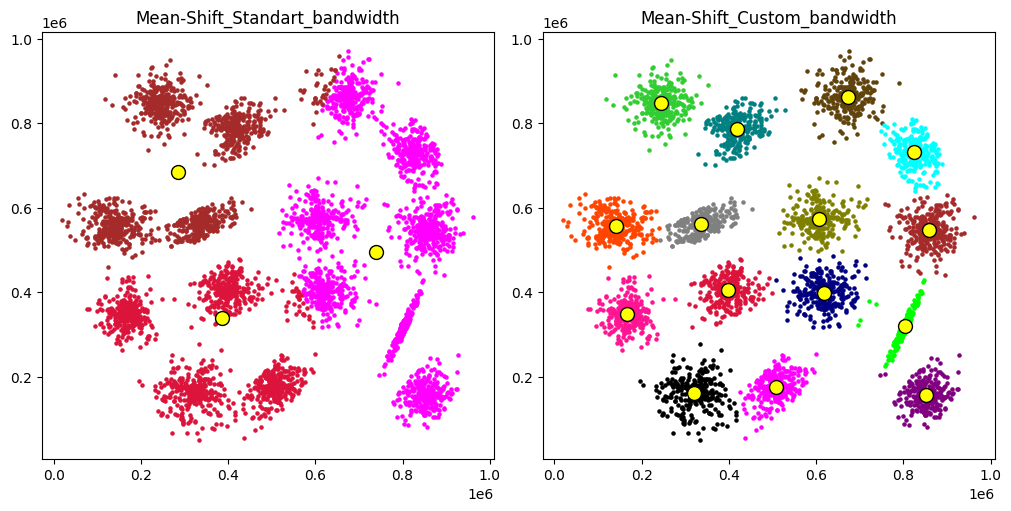

In [94]:
# Mean-Shift visual

#Задал полотно
fig, ax = plt.subplots(1, 2, figsize = (10, 5), layout='constrained')  
ax[0].set_title("Mean-Shift_Standart_bandwidth")
ax[1].set_title("Mean-Shift_Custom_bandwidth")

#Вывел цветом точки одного кластера для каждого кластера
for i in range (min(mean_shift_classic.labels_), max(mean_shift_classic.labels_)+1):
    ax[0].scatter(points[mean_shift_classic_centroids == i, 0], points[mean_shift_classic_centroids == i, 1], s = 5, c = colors[i])
    
for i in range (min(mean_shift_custom.labels_), max(mean_shift_custom.labels_)+1):
    ax[1].scatter(points[mean_shift_custom_centroids == i, 0], points[mean_shift_custom_centroids == i, 1], s = 5, c = colors[i])

#Выставил центроиды
ax[0].scatter(mean_shift_classic.cluster_centers_[:, 0], mean_shift_classic.cluster_centers_[:, 1], s = 100, c = 'yellow', edgecolor = 'k')
ax[1].scatter(mean_shift_custom.cluster_centers_[:, 0], mean_shift_custom.cluster_centers_[:, 1], s = 100, c = 'yellow', edgecolor = 'k')

In [96]:
# AgglomerativeClustering Cluster

agglomerative_clustering = cluster.AgglomerativeClustering(n_clusters = def_clusters, affinity = 'euclidean')
agglomerative_clustering_centroids = agglomerative_clustering.fit_predict(points)

c:\Users\solom\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


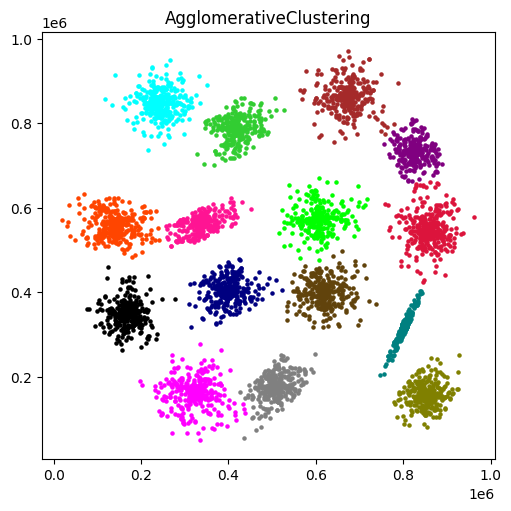

In [97]:
# AgglomerativeClustering Visual

#Задал полотно
fig, ax = plt.subplots(figsize = (5, 5), layout='constrained')  
ax.set_title("AgglomerativeClustering")

#Вывел цветом точки одного кластера для каждого кластера
for i in range (min(agglomerative_clustering.labels_), max(agglomerative_clustering.labels_)+1):
    ax.scatter(points[agglomerative_clustering_centroids == i, 0], points[agglomerative_clustering_centroids == i, 1], s = 5, c = colors[i])

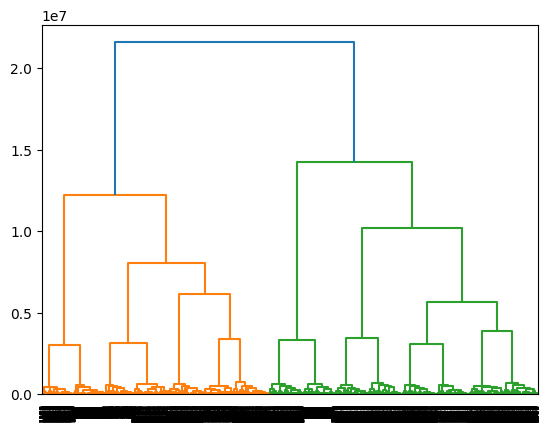

In [95]:
# AgglomerativeClustering Dendrogram

#Дендрограмма по Иерархической кластеризации
dendrogram = sch.dendrogram(sch.linkage(points, method = 'ward'))
plt.title("");

In [98]:
# DBSCAN cluster

# Очень прикольный алгоритм
# Короче, это алгоритм поиска друзей
# eps - дистанция на которой мы их ищем
# min_samples - количество друзей, чтобы быть счастливым

dbscan = cluster.DBSCAN(eps = 45000, min_samples = 50)
dbscan_centroids = dbscan.fit_predict(points)

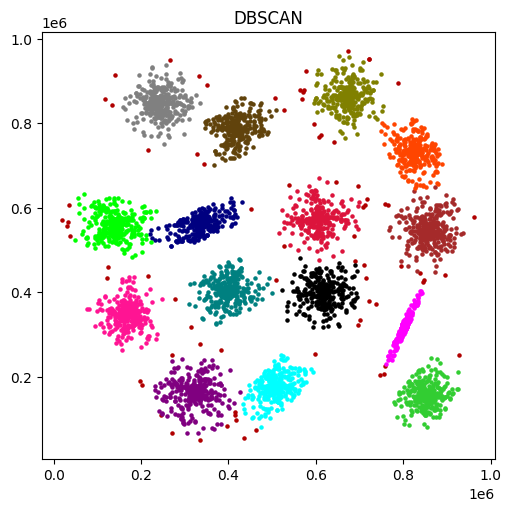

In [99]:
# DBSCAN visual

#Задал полотно
fig, ax = plt.subplots(figsize = (5, 5), layout='constrained')  
ax.set_title("DBSCAN")

#Вывел цветом точки одного кластера для каждого кластера
for i in range (min(dbscan.labels_), max(dbscan.labels_)+1):
    ax.scatter(points[dbscan_centroids == i, 0], points[dbscan_centroids == i, 1], s = 5, c = colors[i])